In [1]:
# python 3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
f_df = pd.read_csv('data/tsgc-fellows-2008-2019.csv')
s_df = pd.read_csv('data/tsgc-scholars-2008-2019.csv')

In [4]:
print('TSGC Fellows 2008 - 2019')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(f_df)

TSGC Fellows 2008 - 2019


,NAME,INSTITUTION,MAJOR,YEAR
0,"Arellano, Christopher",University of Houston,Mechanical Engineering,2008
1,"Berry, Eric",University of Texas at El Paso,Electrical Engineering,2008
2,"Cordova, Gabriel",University of Texas at El Paso,Computer Engineering,2008
3,"Cruz-Campa, Jose",University of Texas at El Paso,Electrical & Computer Engineering,2008
4,"Christian, John",University of Texas at Austin,Aerospace Engineering,2008
5,"Creel, James",Baylor University,Honors Physics,2008
6,Daniels\tIsadora,University of Texas Health Science Center-Houston,Journalism,2008
7,"Davidson, Ryan",University of Texas at Dallas,Physics,2008
8,"Davis, Jeremy",Texas A&M University,Aerospace Engineering,2008
9,"Davis, M. Cheri",Texas A&M University-Commerce,Interdisiplinary Studies,2008


In [5]:
# Total wins per institution
f_df.groupby('INSTITUTION').size().sort_values(ascending=False)

INSTITUTION
Texas A&M University                                                 29
University of Texas at Austin                                        28
University of Texas at Dallas                                        24
Rice University                                                      20
Texas Tech University                                                17
University of Texas at San Antonio                                   16
University of Texas at El Paso                                       13
University of Texas at Arlington                                     13
University of Texas Medical Branch-Galveston                         12
Southern Methodist University                                        11
Baylor University                                                    11
Texas A&M University-Commerce                                        10
Texas Christian University                                            9
Prairie View A&M University                         

In [6]:
uta_data = f_df[f_df['INSTITUTION'].str.contains('arlington', na=False, case=False)]
unique_uta_names = uta_data['NAME'].unique()
for name in unique_uta_names:
    match = uta_data['NAME'] == name
    if match.sum() >= 2:
        display(uta_data[match])
        print('won %d years.' % match.sum())

,NAME,INSTITUTION,MAJOR,YEAR
86,"Haney, Eric",University of Texas at Arlington,Aerospace Engineering,2011
125,"Haney, Eric",University of Texas at Arlington,Aerospace Engineering,2013


won 2 years.


,NAME,INSTITUTION,MAJOR,YEAR
181,"Bonde, Richard",University of Texas at Arlington,Physics,2016
201,"Bonde, Richard",University of Texas at Arlington,Physics,2017


won 2 years.


,NAME,INSTITUTION,MAJOR,YEAR
207,"Haley, James",University of Texas at Arlington,Aerospace Engineering,2017
227,"Haley, James",University of Texas at Arlington,Aerospace Engineering,2018


won 2 years.


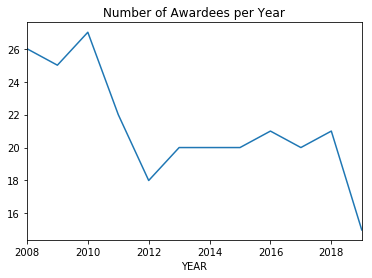

In [7]:
f_df.groupby('YEAR').size().plot(title='Number of Awardees per Year', x='Year', y='Awardees')
plt.show()

In [8]:
total_awarded = f_df.shape[0]*5000 + s_df.shape[0]*1500
print('Total Awarded from 2008-2019:', '${:,.2f}'.format(total_awarded))

Total Awarded from 2008-2019: $1,801,500.00


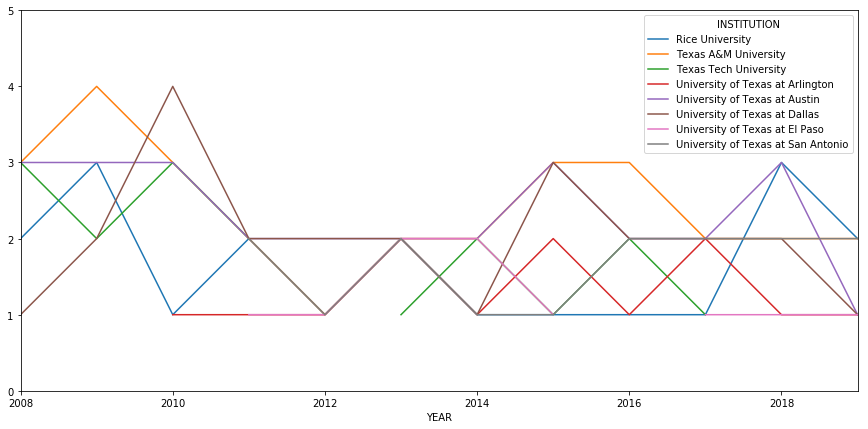

In [9]:
major_schools_df = f_df.groupby('INSTITUTION').filter(lambda x: len(x) >= 13)
fig, ax = plt.subplots(figsize=(15,7))
major_schools_df.groupby(['YEAR', 'INSTITUTION']).count()['NAME'].unstack().plot(ax=ax, ylim=(0,5))

In [10]:
unique_names = f_df['NAME'].unique()
count = 0
for name in unique_names:
    match = f_df['NAME'] == name
    if match.sum() >= 2:
        display(f_df[match])
        print('won %d times.' % match.sum())
        count += 1

print('\n%d students have won the fellowship more than once.' % count)

,NAME,INSTITUTION,MAJOR,YEAR
4,"Christian, John",University of Texas at Austin,Aerospace Engineering,2008
29,"Christian, John",University of Texas at Austin,NaN,2009


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
5,"Creel, James",Baylor University,Honors Physics,2008
31,"Creel, James",Baylor University,NaN,2009


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
7,"Davidson, Ryan",University of Texas at Dallas,Physics,2008
55,"Davidson, Ryan",University of Texas at Dallas,Physics,2010


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
12,"Garner, Michael",University of Texas at Austin,Aerospace Engineering,2008
35,"Garner, Michael",University of Texas at Austin,NaN,2009


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
14,"Landes, Nicholas",Texas Tech University,Mathematics,2008
39,"Landes, Nicholas",Texas Tech University,NaN,2009


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
15,"Moore, D'Vesharronne",Texas A&M University,Chemistry,2008
42,"Moore, D'Vesharronne",Texas A&M University,NaN,2009


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
18,"Smith, Cassidy",Texas Christian University,Physics,2008
45,"Smith, Cassidy",Texas Christian University,NaN,2009


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
20,"Swain, Shayla",Texas Tech University,Industrial Engineering,2008
46,"Swain, Shayla",Texas Tech University,NaN,2009


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
25,"Young, Kristina",University of Houston,Physics,2008
50,"Young, Kristina",University of Houston,NaN,2009


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
27,"Burrell, Angeline",University of Texas at Dallas,NaN,2009
53,"Burrell, Angeline",University of Texas at Dallas,Physics,2010
79,"Burrell, Angeline",University of Texas at Dallas,Physics,2011


won 3 times.


,NAME,INSTITUTION,MAJOR,YEAR
33,"Davis, Cheri",Texas A&M University-Commerce,NaN,2009
56,"Davis, Cheri",Texas A&M University-Commerce,Hied,2010


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
34,"DeMars, Kyle",University of Texas at Austin,NaN,2009
57,"DeMars, Kyle",University of Texas at Austin,Aerospace Engineering,2010


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
36,"Haaser, Robert",University of Texas at Dallas,NaN,2009
63,"Haaser, Robert",University of Texas at Dallas,Physics,2010


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
43,"Norman, Jullian",Prairie View A&M University,NaN,2009
71,"Norman, Jullian",Prairie View A&M University,Mechanical Engineering,2010


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
59,"English, Kirk",University of Texas Medical Branch-Galveston,Biomedical Science,2010
82,"English, Kirk",University of Texas Medical Branch-Galveston,Biomedical Science,2011
101,"English, Kirk",University of Texas Medical Branch-Galveston,Biomedical Science,2012


won 3 times.


,NAME,INSTITUTION,MAJOR,YEAR
62,"Greenwald, Jared",Baylor University,Physics,2010
104,"Greenwald, Jared",Baylor University,Physics,2012
124,"Greenwald, Jared",Baylor University,Physics,2013


won 3 times.


,NAME,INSTITUTION,MAJOR,YEAR
64,"Johnson, Quincy",Prairie View A&M University,Mechanical Engineering,2010
89,"Johnson, Quincy",Prairie View A&M University,Mechanical Engineering,2011


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
68,"Meyer, Eileen",Rice University,Astrophysics,2010
92,"Meyer, Eileen",Rice University,Physics,2011


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
73,"Raizada, Miles",Texas Tech University,Business & Pre-Med,2010
94,"Raizada, Miles",Texas Tech University,Medicine,2011


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
74,"Roscoe, Christopher",Texas A&M University,Aerospace Engineering,2010
96,"Roscoe, Christopher",Texas A&M University,Aerospace Engineering,2011


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
78,"Buckley, Robert",University of Texas at San Antonio,Physics,2011
120,"Buckley, Robert",University of Texas at San Antonio,Physics,2013


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
80,"Christenson, Dylan",Texas Tech University,Civil & Environmental Engineering,2011
121,"Christenson, Dylan",Texas Tech University,Civil & Environmental Engineering,2013


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
83,"Frias, Jorge",University of Texas at El Paso,Mechanical Engineering,2011
102,"Frias, Jorge",University of Texas at El Paso,Mechanical Engineering,2012


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
86,"Haney, Eric",University of Texas at Arlington,Aerospace Engineering,2011
125,"Haney, Eric",University of Texas at Arlington,Aerospace Engineering,2013


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
87,"Harris, Brandon",Baylor University,Physics,2011
105,"Harris, Brandon",Baylor University,Physics,2012


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
88,"Jennings, Abby",Southern Methodist University,Chemistry,2011
106,"Jennings, Abby",Southern Methodist University,Chemistry,2012
129,"Jennings, Abby",Southern Methodist University,Chemistry,2013


won 3 times.


,NAME,INSTITUTION,MAJOR,YEAR
90,"Martinez, Felix",University of Texas Pan American,Mechanical Engineering,2011
108,"Martinez, Felix",University of Texas Pan American,Mechanical Engineering,2012


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
93,"Murphy, Thomas",University of Texas at Austin,Mechanical Engineering,2011
110,"Murphy, Thomas",University of Texas at Austin,Mechanical Engineering,2012


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
97,"Thompson, Benjamin",Texas Christian University,Physics,2011
115,"Thompson, Benjamin",Texas Christian University,Astrophysics & Mathematics,2012


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
98,"Ubanyionwu, Samuel",Texas Southern University,Chemistry,2011
117,"Ubanyionwu, Samuel",Texas Southern University,Chemistry,2012


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
100,"Aures-Cavalieri, Kurt",Texas A&M University,Aerospace Engineering,2012
118,"Aures-Cavalieri, Kurt",Texas A&M University,Aerospace Engineering,2013


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
107,"Llera, Kristie",University of Texas at San Antonio,Space Physics,2012
131,"Llera, Kristie",University of Texas at San Antonio,Space Physics,2013
149,"Llera, Kristie",Southwest Research Institute / University of T...,Space Physics,2014


won 3 times.


,NAME,INSTITUTION,MAJOR,YEAR
112,"Peel, Austin",University of Texas at Dallas,Physics,2012
153,"Peel, Austin",University of Dallas,Physics,2014


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
116,"Troxel, Michael",University of Texas at Dallas,Physics,2012
135,"Troxel, Michael",University of Texas at Dallas,Physics,2013


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
133,"Probe, Austin",Texas A&M University,Aerospace Engineering,2013
154,"Probe, Austin",Texas A&M University,Aerospace Engineering,2014
171,"Probe, Austin",Texas A&M University,Aerospace Engineering,2015


won 3 times.


,NAME,INSTITUTION,MAJOR,YEAR
134,"Rose, Chad",Rice University,Mechanical Engineering,2013
155,"Rose, Chad",Rice University,Mechanical Engineering,2014
172,"Rose, Chad",Rice University,Mechanical Engineering,2015
196,"Rose, Chad",Rice University,Mechanical Engineering,2016


won 4 times.


,NAME,INSTITUTION,MAJOR,YEAR
137,"Ubanyionwu, Jessica",Baylor University,Health Science,2013
157,"Ubanyionwu, Jessica",University of Texas Medical Branch-Galveston,Health Science Studies,2014
174,"Ubanyionwu, Jessica",Baylor University,Health Science Studies,2015


won 3 times.


,NAME,INSTITUTION,MAJOR,YEAR
139,"Barragan, Juan",University of Texas at El Paso,Mechanical Engineering,2014
158,"Barragan, Juan",University of Texas at El Paso,Mechanical Engineering,2015


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
140,"Bosch, Mathieu",Texas A&M University,Inorganic Chemistry,2014
159,"Bosch, Mathieu",Texas A&M University,Inorganic Chemistry,2015


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
141,"Broll, Jeffrey",University of Texas at San Antonio,Physics,2014
160,"Broll, Jeffrey",University of Texas at San Antonio,Mathematics,2015
182,"Broll, Jeffrey",University of Texas at San Antonio,Mathematical,2016


won 3 times.


,NAME,INSTITUTION,MAJOR,YEAR
144,"Coleman, Joseph",University of Texas at Dallas,Physics,2014
161,"Coleman, Joseph",University of Texas at Dallas,Physics,2015
184,"Coleman, Joseph",University of Texas at Dallas,Physics,2016


won 3 times.


,NAME,INSTITUTION,MAJOR,YEAR
146,"Eldad, Ofer",University of Texas at Austin,Aerospace Engineering,2014
163,"Eldad, Ofer",University of Texas at Austin,Aerospace Engineering,2015


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
147,"Grubbs, Guy",Southwest Research Institute / University of T...,Physics & Astronomy,2014
165,"Grubbs, Guy",Southwest Research Institute / University of T...,Physics & Astronomy,2015


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
151,"Monaco, Paula",Texas Tech University,Civil Engineering,2014
169,"Monaco, Paula",Texas Tech University,Environmental Engineering,2015


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
152,"Neilson, Brittany",Texas Tech University,Human Factors,2014
194,"Neilson, Brittany",Texas Tech University,Human Factors,2016
210,"Neilson, Brittany",Texas Tech University,Human Factors,2017


won 3 times.


,NAME,INSTITUTION,MAJOR,YEAR
164,"Grisham, James",University of Texas at Arlington,Aerospace Engineering,2015
187,"Grisham, James",University of Texas at Austin,Aerospace Engineering,2016


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
168,"Lee, Brandyn",University of Texas at Dallas,Mathematics,2015
192,"Lee, Brandyn",University of Texas at Dallas,Mathematics,2016
208,"Lee, Brandyn",University of Texas at Dallas,Physics,2017


won 3 times.


,NAME,INSTITUTION,MAJOR,YEAR
173,"Thomas, James",Texas A&M University-Commerce,Physics,2015
217,"Thomas, James",Texas A&M University,Mechanical Engineering,2017


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
175,"Vines, Sarah",Southwest Research Institute / University of T...,Physics,2015
198,"Vines, Sarah",University of Texas at San Antonio,Space Sciences & Astrobiology,2016


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
180,"Barnette, Brooke",University of Texas Medical Branch-Galveston,Biochemistry & Molecular Biology,2016
200,"Barnette, Brooke",University of Texas Medical Branch-Galveston,Biochemistry & Molecular Biology,2017
220,"Barnette, Brooke",University of Texas Medical Branch-Galveston,Biochemistry & Molecular Biology,2018


won 3 times.


,NAME,INSTITUTION,MAJOR,YEAR
181,"Bonde, Richard",University of Texas at Arlington,Physics,2016
201,"Bonde, Richard",University of Texas at Arlington,Physics,2017


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
183,"Bunton, Caleb",Southern Methodist University,Chemistry,2016
222,"Bunton, Caleb",Southern Methodist University,Chemistry,2018


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
185,"Donor, John",Texas Christian University,Physics & Astronomy,2016
205,"Donor, John",Texas Christian University,Physics & Astronomy,2017
225,"Donor, John",Texas Christian University,Physics & Astronomy,2018


won 3 times.


,NAME,INSTITUTION,MAJOR,YEAR
202,"Clark, Janelle",Rice University,Mechanical Engineering,2017
223,"Clark, Janelle",Rice University,Mechanical Engineering,2018


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
203,"De Luna, Brandon",University of Texas at Austin,Radiation Physics & Chemistry,2017
224,"De Luna, Brandon",University of Texas at Austin,Engineering & Nuclear & Radiation Engineering ...,2018


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
207,"Haley, James",University of Texas at Arlington,Aerospace Engineering,2017
227,"Haley, James",University of Texas at Arlington,Aerospace Engineering,2018


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
209,"Moyes, Alexander",Texas A&M University,Aerospace Engineering,2017
231,"Moyes, Alexander",Texas A&M University,Aerospace Engineering,2018


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
211,"Ray, Christine",University of Texas at San Antonio,Physics,2017
235,"Ray, Christine",University of Texas at San Antonio,Physics,2018
251,"Ray, Christine",University of Texas at San Antonio,Astrophysics & Animal Sciences,2019


won 3 times.


,NAME,INSTITUTION,MAJOR,YEAR
215,"Shidler, Sam",University of Texas at Dallas,Physics,2017
237,"Shidler, Sam",University of Texas at Dallas,Physics,2018


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
216,"Solis, Angel",University of Texas at El Paso,Electrical & Computer Engineering,2017
238,"Solis, Angel",University of Texas at El Paso,Electrical & Computer Engineering,2018


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
226,"Dunkelberger, Nathan",Rice University,Mechanical Engineering,2018
241,"Dunkelberger, Nathan",Rice University,Mechanical Engineering,2019


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
228,"Magana, Lizeth",University of Texas at San Antonio,Physics,2018
244,"Magana, Lizeth",University of Texas at San Antonio,Physics,2019


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
229,"McArdle, Sean",University of Texas at Austin,Aerospace Engineering,2018
247,"McArdle, Sean",University of Texas at Austin,Aerospace Engineering,2019


won 2 times.

63 students have won the fellowship more than once.


In [11]:
print('TSGC Scholars 2008 - 2019')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(s_df)

TSGC Scholars 2008 - 2019


,NAME,INSTITUTION,MAJOR,YEAR
0,"Aguirre, Alexander",University of Texas at El Paso,Electrical Engineering,2008
1,"Aragon, Aaron",University of Texas at El Paso,Electrical Engineering,2008
2,"Araya, Daniel",Texas A&M University,Aerospace Engineering,2008
3,"Bankole, Olasunkanmi",Texas A&M University,Chemical Engineering,2008
4,"Barsten, Kristina",Texas A&M University,Biomedical Engineering,2008
5,"Bowman, Amber",Texas A&M University-Commerce,Interdisciplinary Studies (4-8 Grade Science E...,2008
6,"Carr, Andrew",University of Texas at Arlington,Aerospace Engineering,2008
7,"Chang, Vicki",University of Texas at Austin,Chemistry Honors (BS) & Plan II Honors (BA),2008
8,"Cherry, Jonah",Lamar University,Mechanical Engineering,2008
9,"De, Shuvro",Rice University,Biochemistry & Cell Biology,2008


In [12]:
unique_names = s_df['NAME'].unique()
count = 0
for name in unique_names:
    match = s_df['NAME'] == name
    if match.sum() >= 2:
        display(s_df[match])
        print('won %d times.' % match.sum())
        count += 1

print('\n%d students have won the scholarship more than once.' % count)

,NAME,INSTITUTION,MAJOR,YEAR
0,"Aguirre, Alexander",University of Texas at El Paso,Electrical Engineering,2008
41,"Aguirre, Alexander",University of Texas at El Paso,Computer & Electrical Engineering,2009


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
10,"Eyre, Katherine",Angelo State University,Mathematics,2008
52,"Eyre, Katherine",Angelo State University,Mathematics,2009


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
11,"Fernandez, Andres",University of Texas at Tyler,Electrical Engineering,2008
81,"Fernandez, Andres",University of Texas at Dallas,Computer Engineering,2010


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
13,"Golmon, Kristin",Trinity University,Engineering Science,2008
83,"Golmon, Kristin",Trinity University,Engineering Science,2010


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
23,"Martinez, Felix",University of Texas-Pan American,Mechanical Engineering,2008
59,"Martinez, Felix",University of Texas-Pan American,Mechanical Engineering,2009


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
24,"May, Donald",Texas A&M University-Commerce,Physics & Computer Science,2008
60,"May, Donald",Texas A&M University,Physics & Computer Science,2009


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
37,"Ubanyionwu, Samuel",Texas Southern University,Chemistry,2008
69,"Ubanyionwu, Samuel",Texas Southern University,Chemistry,2009


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
39,"Vigstol, Andy",Texas A&M University-Kingsville,NaN,2008
70,"Vigstol, Andy",Texas A&M University-Kingsville,Civil Engineering,2009
100,"Vigstol, Andy",Texas A&M University-Kingsville,Engineering,2010


won 3 times.


,NAME,INSTITUTION,MAJOR,YEAR
42,"Allen, Jason",Texas Tech University,College of Engineering,2009
71,"Allen, Jason",Texas Tech University,Mechanical Engineering,2010


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
46,"Caballero, John",Texas A&M University-Kingsville,Mechanical Engineering,2009
75,"Caballero, John",Texas A&M University-Kingsville,Mechanical Engineering,2010


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
49,"Coleman, Corey",Texas Tech University,Engineering,2009
103,"Coleman, Corey",Texas Tech University,Engineering,2011


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
64,"Smith, Micheal",Texas Southern University,Science & Technology,2009
94,"Smith, Micheal",Texas Southern University,Physics,2010
118,"Smith, Micheal",Texas Southern University,Physics,2011


won 3 times.


,NAME,INSTITUTION,MAJOR,YEAR
87,"Mbonu, Pamela",Texas Southern University,Chemistry,2010
113,"Mbonu, Pamela",Texas Southern University,Chemistry,2011


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
95,"Stultz, Sheryl",Angelo State University,Mathematics,2010
119,"Stultz, Sheryl",Angelo State University,Mathematics,2011
140,"Stultz, Sheryl",Angelo State University,Natural Sciences & Mathematics,2013


won 3 times.


,NAME,INSTITUTION,MAJOR,YEAR
123,"Alabi, Folayinka",University of Houston,Mechanical Engineering,2013
151,"Alabi, Folayinka",University of Houston,Construction Managment,2014


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
133,"Franklin, Chandler",Texas State University-San Marcos,Engineering,2013
156,"Franklin, Chandler",Texas State University-San Marcos,Engineering,2014


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
142,"Ramirez, Suzanne",University of Texas-Pan American,Nursing,2013
163,"Ramirez, Suzanne",University of Texas-Pan American,Nursing,2014


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
148,"Ward, Ayzha",Texas Southern University,Computer Science,2013
172,"Ward, Ayzha",Texas Southern University,Computer Science,2014
203,"Ward, Ayzha",Texas Southern University,Computer Science,2015


won 3 times.


,NAME,INSTITUTION,MAJOR,YEAR
150,"Wilborn, Darius",Prairie View A&M University,Mechanical,2013
176,"Wilborn, Darius",Prairie View A&M University,Mechanical,2014


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
177,"Young, Craig",University of North Texas,Engineering,2014
204,"Young, Craig",University of North Texas,Mechanical & Energy Engineering,2015


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
181,"Foster, Grant",Houston Community College Northwest,Engineering,2015
217,"Foster, Grant",Houston Community College Northwest,Engineering,2016


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
185,"James, Jaylen",Prairie View A&M University,Mechanical Engineering,2015
223,"James, Jaylen",Prairie View A&M University,Mechanical Engineering,2016


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
186,"Madrid, Andrew",University of Texas at El Paso,Engineering,2015
229,"Madrid, Andrew",University of Texas at El Paso,Engineering,2016


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
190,"Ramirez, Leo",University of Texas-Pan American,Engineering,2015
274,"Ramirez, Leo",University of Texas-Rio Grande Valley,Mechanical Engineering,2017


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
193,"Riley, Alexander",University of Texas at Dallas,Physics,2015
237,"Riley, Alexander",University of Texas at Dallas,Physics,2016


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
194,"Robinson, Keilon",Texas Southern University,Chemistry,2015
239,"Robinson, Keilon",Texas Southern University,Chemistry,2016


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
197,"Rusnak, Richard",University of Texas at Austin,Electrical Engineering,2015
241,"Rusnak, Richard",University of Texas at Austin,Electrical Engineering,2016


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
198,"Shipp, William",University of Texas at El Paso,Chemical Engineering,2015
244,"Shipp, William",Lamar University,Chemical Engineering,2016


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
199,"Solis, Angel",University of Texas at El Paso,Electrical & Computer Engineering,2015
245,"Solis, Angel",University of Texas at El Paso,Electrical & Computer Engineering,2016


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
208,"Bastami, Sepehr",University of North Texas,Mechanical & Energy Engineering,2016
249,"Bastami, Sepehr",University of North Texas,Mechanical & Energy Engineering,2017
285,"Bastami, Sepehr",University of North Texas,Mechanical & Energy Engineering,2018


won 3 times.


,NAME,INSTITUTION,MAJOR,YEAR
209,"Berkstresser, Katelynn",Texas A&M University-Commerce,Education,2016
250,"Berkstresser, Katelynn",Texas A&M University-Commerce,Education,2017


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
224,"Kablawi, Vatima",University of Houston,Chemistry & ChemEngr,2016
271,"Kablawi, Vatima",University of Houston,Geology,2017


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
225,"Kirkendall, Alyssa",University of Texas at San Antonio,Geology,2016
260,"Kirkendall, Alyssa",University of Texas at San Antonio,Geology,2017


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
226,"Lehnen, Jamie",University of Houston,Natural Science & Mathematics,2016
263,"Lehnen, Jamie",University of Houston,Biochemical & Biophysical Sciences,2017


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
233,"Okafor, Fred",Prairie View A&M University,Engineering,2016
273,"Okafor, Fred",Prairie View A&M University,Chemical Engineering,2017


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
238,"Rios, Davida",University of Texas at Tyler,Chemistry & Biochemistry,2016
276,"Rios, Davida",University of Texas at Tyler,Chemistry,2017


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
243,"Shepherd, Bailey",University of Texas Southwestern Medical Center,Medical School,2016
281,"Shepherd, Bailey",University of Texas Southwestern Medical Center,Medical School,2017
313,"Shepherd, Bailey",University of Texas Southwestern Medical Center,MD Candidate,2018


won 3 times.


,NAME,INSTITUTION,MAJOR,YEAR
255,"Fontenot, Alicia",Texas Southern University,Chemistry,2017
293,"Fontenot, Alicia",Texas Southern University,Chemistry,2018
335,"Fontenot, Alicia",Texas Southern University,Chemistry,2019


won 3 times.


,NAME,INSTITUTION,MAJOR,YEAR
258,"Judge, Joanne",Lone Star College,Engineering,2017
295,"Judge, Joanne",Lone Star College,Biology,2018


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
268,"Maxwell, Katelyn",Lamar University,Mathematics,2017
300,"Maxwell, Katelyn",Lamar University,Mechanical Engineering & Mathematics,2018
342,"Maxwell, Katelyn",Lamar University,Engineering & Mathematics,2019


won 3 times.


,NAME,INSTITUTION,MAJOR,YEAR
279,"Schmitt, Sydney",Southern Methodist University,Chemistry,2017
311,"Schmitt, Sydney",Southern Methodist University,Chemistry,2018


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
294,"Groezinger, Shandi",Texas A&M University-Commerce,Physics & Mathematics,2018
337,"Groezinger, Shandi",Texas A&M University-Commerce,Physics & Astronomy,2019


won 2 times.


,NAME,INSTITUTION,MAJOR,YEAR
312,"Sepulveda, Aldo",University of Texas at San Antonio,Physics,2018
346,"Sepulveda, Aldo",University of Texas at San Antonio,Physics & Astronomy,2019


won 2 times.

43 students have won the scholarship more than once.


In [13]:
# Total wins per institution
s_df.groupby('INSTITUTION').size().sort_values(ascending=False)

INSTITUTION
Texas Southern University                            26
University of Texas at El Paso                       26
Texas A&M University                                 23
Lamar University                                     23
University of Houston                                21
Prairie View A&M University                          19
University of Texas at Arlington                     16
University of Texas at Austin                        15
Texas A&M University-Commerce                        14
Texas A&M University-Kingsville                      13
University of Texas at Dallas                        12
Trinity University                                   10
Texas Tech University                                10
University of Texas at Tyler                          9
Houston Community College Northwest                   9
Southern Methodist University                         8
University of Houston-Downtown                        8
Texas State University-San Marcos   

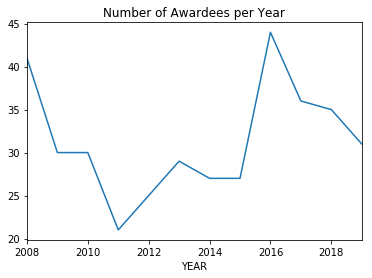

In [14]:
s_df.groupby('YEAR').size().plot(title='Number of Awardees per Year', x='Year', y='Awardees')
plt.show()

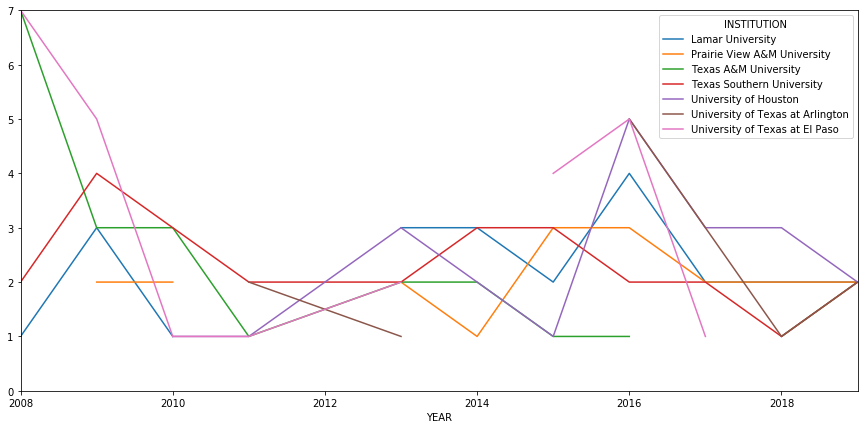

In [15]:
major_schools_df = s_df.groupby('INSTITUTION').filter(lambda x: len(x) >= 16)
fig, ax = plt.subplots(figsize=(15,7))
major_schools_df.groupby(['YEAR', 'INSTITUTION']).count()['NAME'].unstack().plot(ax=ax, ylim=(0,7))